In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [12]:
# inter layer neighbors

map_w = 4; map_h = 6

xy_pos = np.asanyarray(np.meshgrid(np.arange(map_w), np.arange(map_h))).reshape(2,-1).T
xy = np.tile(xy_pos, (1,8))
xy += np.array([-1,-1, 0,-1, +1,-1, 
                -1, 0,       +1, 0, 
                -1,+1, 0,+1, +1,+1])
valide = (xy[:,0::2] >= 0) & (xy[:,0::2] < map_w) & (xy[:,1::2] >= 0) & (xy[:,1::2] < map_h)
idxs = xy[:,1::2] * map_w + xy[:,0::2]

for i in [0, 10, -1]:
    print(idxs[i][valide[i]])
    f = np.zeros(map_w*map_h)
    for j in idxs[i][valide[i]]:
        f[j] = 1
    print(f.reshape((map_h,map_w)))

[1 4 5]
[[ 0.  1.  0.  0.]
 [ 1.  1.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]]
[ 5  6  7  9 11 13 14 15]
[[ 0.  0.  0.  0.]
 [ 0.  1.  1.  1.]
 [ 0.  1.  0.  1.]
 [ 0.  1.  1.  1.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]]
[18 19 22]
[[ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  1.  1.]
 [ 0.  0.  1.  0.]]


In [11]:
# cross layer neighbors

map_w_p = map_w * 2
map_h_p = map_h * 2
xy = np.tile(xy_pos, (1,4)) * 2
xy += np.array([0,0, 1,0,
                0,1, 1,1])
valide = (xy[:,0::2] >= 0) & (xy[:,0::2] < map_w_p) & (xy[:,1::2] >= 0) & (xy[:,1::2] < map_h_p)
idxs = xy[:,1::2] * map_w_p + xy[:,0::2]

for i in [0, 10, -1]:
    print(idxs[i][valide[i]])
    f = np.zeros(map_w_p*map_h_p)
    for j in idxs[i][valide[i]]:
        f[j] = 1
    print(f.reshape((map_h_p,map_w_p)))

[0 1 8 9]
[[ 1.  1.  0.  0.  0.  0.  0.  0.]
 [ 1.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]]
[36 37 44 45]
[[ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  1.  0.  0.]
 [ 0.  0.  0.  0.  1.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]]
[86 87 94 95]
[[ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  

a = 1.63  b = 1.68  a_p = -0.61  b_p = 0.53  


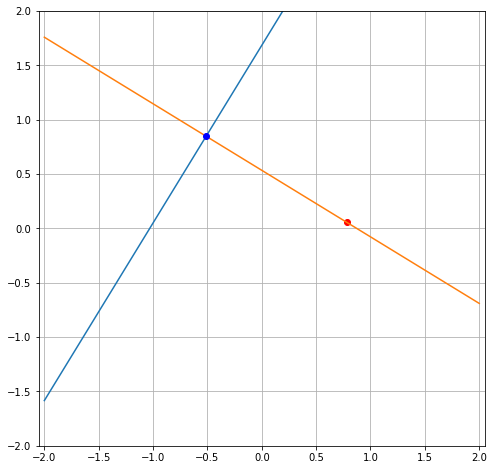

In [192]:
# project point on line

p = np.random.randn(2)
b = np.random.random()*2
a = np.random.random()*2

x_p, y_p = p

#y_p = a_p * x_p + b_p
a_p = -1/a
b_p = y_p - a_p * x_p
x_s = (b_p - b) / (a - a_p)
y_s = a * x_s + b

x_s = (y_p + 1/a * x_p - b) / (a + 1/a)
y_s = a * x_s + b

print('a = %4.2f  b = %4.2f  a_p = %4.2f  b_p = %4.2f  ' % (a, b, a_p, b_p))

plt.figure(figsize=[8]*2)

plt.plot(x_p, y_p, 'or')
x = np.array([-2,2])
plt.plot(x, a*x + b)
plt.plot(x, a_p*x + b_p)
plt.plot(x_s, y_s, 'ob')

plt.grid()
plt.ylim([-2,2])
plt.xlim([-2,2])
plt.axes().set_aspect('equal', 'datalim')
plt.show()